STEPS IN EXPLORATORY DATA ANALYSIS:

1.Identification of variable and data type
(Numeric and discrete)
2.Analyzing the basic metrics
3.Non-Graphical Univariate Analysis:
4.Variable transformations
5.Graphical variate Analysis
6.Correlation Analysis



1. Backtest & Performance Stats

In [ ]:
#Importing library

In [261]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
import statsmodels.api as sm

In [ ]:
#Importing dataset

In [262]:
data=pd.read_csv(r'minuteData_NbTicksMin25_BusDay100_2020-12-31.csv', index_col=0)

In [ ]:
#Identification of data types

In [263]:
data.dtypes

TSLA_open    float64
AAPL_open    float64
NVDA_open    float64
ORCL_open    float64
SPY_open     float64
MSFT_open    float64
C_open       float64
FB_open      float64
QQQ_open     float64
AMZN_open    float64
WFC_open     float64
SQQQ_open    float64
WMT_open     float64
UBER_open    float64
BA_open      float64
INTC_open    float64
PFE_open     float64
BAC_open     float64
NFLX_open    float64
MU_open      float64
XOM_open     float64
GILD_open    float64
SNAP_open    float64
GE_open      float64
IWM_open     float64
dtype: object

In [4]:
data.head(2)

,TSLA_open,AAPL_open,NVDA_open,ORCL_open,SPY_open,MSFT_open,C_open,FB_open,QQQ_open,AMZN_open,...,INTC_open,PFE_open,BAC_open,NFLX_open,MU_open,XOM_open,GILD_open,SNAP_open,GE_open,IWM_open
timeStamp,,,,,,,,,,,,,,,,,,,,,
2020-08-14 09:30:00-04:00,332.9980,114.8288,461.20,54.030,336.41,208.76,52.450,262.305,273.01,3178.18,...,48.73,38.01,26.06,482.82,45.60,42.6000,68.09,21.9000,6.54,156.28
2020-08-14 09:31:00-04:00,330.6161,114.7500,461.28,53.865,336.42,208.93,52.565,261.960,273.03,3177.00,...,48.80,38.06,26.12,483.25,45.55,42.6608,68.17,21.9901,6.53,156.47


In [5]:
data.tail(2)

,TSLA_open,AAPL_open,NVDA_open,ORCL_open,SPY_open,MSFT_open,C_open,FB_open,QQQ_open,AMZN_open,...,INTC_open,PFE_open,BAC_open,NFLX_open,MU_open,XOM_open,GILD_open,SNAP_open,GE_open,IWM_open
timeStamp,,,,,,,,,,,,,,,,,,,,,
2020-12-31 15:58:00-05:00,706.150,132.840,522.005,64.65,374.22,222.57,61.75,273.36,313.915,3258.63,...,49.845,36.88,30.335,541.43,75.1782,41.2,58.3089,50.0099,10.785,196.40
2020-12-31 15:59:00-05:00,706.392,132.865,522.150,64.68,374.30,222.67,61.75,273.45,313.900,3258.08,...,49.845,36.90,30.340,540.96,75.2000,41.2,58.2900,49.9950,10.800,196.39


In [ ]:
#Size of data types

In [264]:
data.shape

(37470, 25)

Statistical Summary of Numeric Variables:

In [265]:
data.describe()

,TSLA_open,AAPL_open,NVDA_open,ORCL_open,SPY_open,MSFT_open,C_open,FB_open,QQQ_open,AMZN_open,...,INTC_open,PFE_open,BAC_open,NFLX_open,MU_open,XOM_open,GILD_open,SNAP_open,GE_open,IWM_open
count,37470.000000,37470.000000,37469.000000,37415.000000,37470.000000,37470.000000,37470.000000,37470.000000,37470.000000,37398.000000,...,37470.000000,37469.000000,37470.000000,37444.000000,37470.000000,37470.000000,37470.000000,37470.000000,37470.000000,37470.000000
mean,475.184204,119.390926,526.179586,59.003667,349.232803,213.931940,49.976394,272.931877,288.526016,3203.136144,...,49.233651,37.459431,26.231403,503.613578,55.628704,37.828421,62.039742,35.180871,8.076495,167.276357
std,95.786733,6.629634,22.940046,2.690345,13.916516,6.830733,6.323288,11.244823,13.130969,117.547901,...,2.692178,1.483989,2.012509,22.230850,9.871842,3.513969,3.010058,11.184144,1.873146,16.081407
min,325.436000,103.880000,458.130000,53.670000,319.930000,196.455000,40.510000,244.470000,260.260000,2878.574000,...,43.630000,34.610000,22.960000,459.120000,42.370000,31.135000,56.560000,20.700000,5.930000,142.160000
25%,413.057000,114.920400,510.970000,56.965000,338.250000,209.280000,43.670000,265.660000,278.150000,3132.000000,...,46.760000,36.434300,24.510000,484.724125,48.085000,34.355000,59.799175,24.300000,6.400000,154.970000
50%,432.954500,118.150000,528.330000,59.185000,347.250000,213.670000,50.390000,273.232500,288.150000,3186.795000,...,49.505000,37.055000,25.660000,498.137500,51.590000,37.555000,61.257250,37.980000,7.355000,161.100000
75%,554.815000,123.290000,540.840800,60.330000,361.950000,218.150000,55.685000,278.585600,298.570000,3274.389575,...,50.800000,38.090000,28.399750,522.375000,63.755000,41.235575,64.410000,44.825000,10.265000,182.000825
max,718.359400,138.540000,588.150000,66.155000,374.300000,232.790000,61.915000,304.220000,314.630000,3547.000000,...,55.670000,43.070000,30.520000,571.080000,75.640000,44.455000,69.748000,54.690000,11.490000,201.160000


In [6]:
tickers=list(data)
print(tickers)

['TSLA_open', 'AAPL_open', 'NVDA_open', 'ORCL_open', 'SPY_open', 'MSFT_open', 'C_open', 'FB_open', 'QQQ_open', 'AMZN_open', 'WFC_open', 'SQQQ_open', 'WMT_open', 'UBER_open', 'BA_open', 'INTC_open', 'PFE_open', 'BAC_open', 'NFLX_open', 'MU_open', 'XOM_open', 'GILD_open', 'SNAP_open', 'GE_open', 'IWM_open']


In [ ]:
#transpose dataset

In [8]:
result=data.transpose()
print(result)
result.to_csv('./{r}.csv', index=True)

timeStamp  2020-08-14 09:30:00-04:00  2020-08-14 09:31:00-04:00  \
TSLA_open                   332.9980                   330.6161   
AAPL_open                   114.8288                   114.7500   
NVDA_open                   461.2000                   461.2800   
ORCL_open                    54.0300                    53.8650   
SPY_open                    336.4100                   336.4200   
MSFT_open                   208.7600                   208.9300   
C_open                       52.4500                    52.5650   
FB_open                     262.3050                   261.9600   
QQQ_open                    273.0100                   273.0300   
AMZN_open                  3178.1800                  3177.0000   
WFC_open                     24.7900                    24.8000   
SQQQ_open                    27.1000                    27.1000   
WMT_open                    132.3400                   132.4500   
UBER_open                    30.4000                    30.451

In [12]:
list(result)


['2020-08-14 09:30:00-04:00',
 '2020-08-14 09:31:00-04:00',
 '2020-08-14 09:32:00-04:00',
 '2020-08-14 09:33:00-04:00',
 '2020-08-14 09:34:00-04:00',
 '2020-08-14 09:35:00-04:00',
 '2020-08-14 09:36:00-04:00',
 '2020-08-14 09:37:00-04:00',
 '2020-08-14 09:38:00-04:00',
 '2020-08-14 09:39:00-04:00',
 '2020-08-14 09:40:00-04:00',
 '2020-08-14 09:41:00-04:00',
 '2020-08-14 09:42:00-04:00',
 '2020-08-14 09:43:00-04:00',
 '2020-08-14 09:44:00-04:00',
 '2020-08-14 09:45:00-04:00',
 '2020-08-14 09:46:00-04:00',
 '2020-08-14 09:47:00-04:00',
 '2020-08-14 09:48:00-04:00',
 '2020-08-14 09:49:00-04:00',
 '2020-08-14 09:50:00-04:00',
 '2020-08-14 09:51:00-04:00',
 '2020-08-14 09:52:00-04:00',
 '2020-08-14 09:53:00-04:00',
 '2020-08-14 09:54:00-04:00',
 '2020-08-14 09:55:00-04:00',
 '2020-08-14 09:56:00-04:00',
 '2020-08-14 09:57:00-04:00',
 '2020-08-14 09:58:00-04:00',
 '2020-08-14 09:59:00-04:00',
 '2020-08-14 10:00:00-04:00',
 '2020-08-14 10:01:00-04:00',
 '2020-08-14 10:02:00-04:00',
 '2020-08-

In [14]:
a=pd.read_csv('12.csv', index_col=0)
a

,2020-08-14 09:30:00-04:00,2020-08-14 09:31:00-04:00,2020-08-14 09:32:00-04:00,2020-08-14 09:33:00-04:00,2020-08-14 09:34:00-04:00,2020-08-14 09:35:00-04:00,2020-08-14 09:36:00-04:00,2020-08-14 09:37:00-04:00,2020-08-14 09:38:00-04:00,2020-08-14 09:39:00-04:00,...,2020-10-13 15:53:00-04:00,2020-10-13 15:54:00-04:00,2020-10-13 15:55:00-04:00,2020-10-13 15:56:00-04:00,2020-10-13 15:57:00-04:00,2020-10-13 15:58:00-04:00,2020-10-13 15:59:00-04:00,2020-10-14 09:30:00-04:00,2020-10-14 09:31:00-04:00,2020-10-14 09:32:00-04:00
Stock,,,,,,,,,,,,,,,,,,,,,
TSLA_open,332.9980,330.6161,331.2920,332.9500,331.6272,329.620,331.9540,330.4330,331.0000,332.2923,...,447.240,446.5050,446.690,446.8900,446.5800,446.5400,446.7800,449.780,448.9000,449.0800
AAPL_open,114.8288,114.7500,114.6325,114.6575,114.4225,114.165,114.3225,114.3275,114.3950,114.4375,...,121.450,121.2700,121.140,121.1450,121.2136,121.1500,121.1200,121.000,120.4200,120.3268
NVDA_open,461.2000,461.2800,461.8016,463.7550,462.0636,460.400,463.1100,463.7450,463.8500,465.4541,...,570.810,570.3491,570.730,570.8100,571.0800,570.9900,570.6900,571.620,568.7900,568.2500
ORCL_open,54.0300,53.8650,53.8100,53.8900,53.9600,54.040,54.0000,54.0700,54.1300,54.1150,...,61.110,61.1300,61.120,61.0900,61.0450,61.0450,61.0500,61.350,61.0700,61.1900
SPY_open,336.4100,336.4200,336.1600,336.4150,336.1300,336.040,336.2900,336.3700,336.5200,336.4500,...,350.880,350.7750,350.750,350.7900,350.6900,350.6200,350.6400,350.750,350.5900,350.6300
MSFT_open,208.7600,208.9300,208.4000,208.9200,208.9300,208.470,209.0100,209.2800,209.3000,209.4400,...,223.820,223.6400,223.320,223.1300,222.9650,223.0300,223.2500,223.000,222.7200,222.4700
C_open,52.4500,52.5650,52.7000,52.5600,52.4700,52.540,52.4600,52.4600,52.5150,52.5700,...,43.745,43.7150,43.760,43.7500,43.7250,43.7099,43.7200,43.520,43.5400,43.6200
FB_open,262.3050,261.9600,262.1600,262.3400,261.8229,261.270,262.0300,262.3600,262.2000,262.0100,...,276.840,276.7000,276.320,276.1350,276.2000,276.2600,276.4075,277.620,276.8100,276.6300
QQQ_open,273.0100,273.0300,272.6400,273.0400,272.8000,272.420,272.8800,272.9400,273.1300,273.1600,...,295.290,295.0500,294.820,294.8300,294.7800,294.7300,294.7650,295.320,294.6600,294.5900


In [15]:
list(a)

['2020-08-14 09:30:00-04:00',
 '2020-08-14 09:31:00-04:00',
 '2020-08-14 09:32:00-04:00',
 '2020-08-14 09:33:00-04:00',
 '2020-08-14 09:34:00-04:00',
 '2020-08-14 09:35:00-04:00',
 '2020-08-14 09:36:00-04:00',
 '2020-08-14 09:37:00-04:00',
 '2020-08-14 09:38:00-04:00',
 '2020-08-14 09:39:00-04:00',
 '2020-08-14 09:40:00-04:00',
 '2020-08-14 09:41:00-04:00',
 '2020-08-14 09:42:00-04:00',
 '2020-08-14 09:43:00-04:00',
 '2020-08-14 09:44:00-04:00',
 '2020-08-14 09:45:00-04:00',
 '2020-08-14 09:46:00-04:00',
 '2020-08-14 09:47:00-04:00',
 '2020-08-14 09:48:00-04:00',
 '2020-08-14 09:49:00-04:00',
 '2020-08-14 09:50:00-04:00',
 '2020-08-14 09:51:00-04:00',
 '2020-08-14 09:52:00-04:00',
 '2020-08-14 09:53:00-04:00',
 '2020-08-14 09:54:00-04:00',
 '2020-08-14 09:55:00-04:00',
 '2020-08-14 09:56:00-04:00',
 '2020-08-14 09:57:00-04:00',
 '2020-08-14 09:58:00-04:00',
 '2020-08-14 09:59:00-04:00',
 '2020-08-14 10:00:00-04:00',
 '2020-08-14 10:01:00-04:00',
 '2020-08-14 10:02:00-04:00',
 '2020-08-

In [16]:

columns=['2020-08-14 09:30:00-04:00',
 '2020-08-14 09:31:00-04:00',
 '2020-08-14 09:32:00-04:00',
 '2020-08-14 09:33:00-04:00',
 '2020-08-14 09:34:00-04:00',
 '2020-08-14 09:35:00-04:00',
 '2020-08-14 09:36:00-04:00',
 '2020-08-14 09:37:00-04:00',
 '2020-08-14 09:38:00-04:00',
 '2020-08-14 09:39:00-04:00',
 '2020-08-14 09:40:00-04:00',
 '2020-08-14 09:41:00-04:00',
 '2020-08-14 09:42:00-04:00',
 '2020-08-14 09:43:00-04:00',
 '2020-08-14 09:44:00-04:00',
 '2020-08-14 09:45:00-04:00',
 '2020-08-14 09:46:00-04:00',
 '2020-08-14 09:47:00-04:00',
 '2020-08-14 09:48:00-04:00',
 '2020-08-14 09:49:00-04:00',
 '2020-08-14 09:50:00-04:00',
 '2020-08-14 09:51:00-04:00',
 '2020-08-14 09:52:00-04:00',
 '2020-08-14 09:53:00-04:00',
 '2020-08-14 09:54:00-04:00',
 '2020-08-14 09:55:00-04:00',
 '2020-08-14 09:56:00-04:00',
 '2020-08-14 09:57:00-04:00',
 '2020-08-14 09:58:00-04:00',
 '2020-08-14 09:59:00-04:00',
 '2020-08-14 10:00:00-04:00',
 '2020-08-14 10:01:00-04:00',
 '2020-08-14 10:02:00-04:00',
 '2020-08-14 10:03:00-04:00',
 '2020-08-14 10:04:00-04:00',
 '2020-08-14 10:05:00-04:00',
 '2020-08-14 10:06:00-04:00',
 '2020-08-14 10:07:00-04:00',
 '2020-08-14 10:08:00-04:00',
 '2020-08-14 10:09:00-04:00',
 '2020-08-14 10:10:00-04:00',
 '2020-08-14 10:11:00-04:00',
 '2020-08-14 10:12:00-04:00',
 '2020-08-14 10:13:00-04:00',
 '2020-08-14 10:14:00-04:00',
 '2020-08-14 10:15:00-04:00',
 '2020-08-14 10:16:00-04:00',
 '2020-08-14 10:17:00-04:00',
 '2020-08-14 10:18:00-04:00',
 '2020-08-14 10:19:00-04:00',
 '2020-08-14 10:20:00-04:00',
 '2020-08-14 10:21:00-04:00',
 '2020-08-14 10:22:00-04:00',
 '2020-08-14 10:23:00-04:00',
 '2020-08-14 10:24:00-04:00',
 '2020-08-14 10:25:00-04:00',
 '2020-08-14 10:26:00-04:00',
 '2020-08-14 10:27:00-04:00',
 '2020-08-14 10:28:00-04:00',
 '2020-08-14 10:29:00-04:00',
 '2020-08-14 10:30:00-04:00',
 '2020-08-14 10:31:00-04:00',
 '2020-08-14 10:32:00-04:00',
 '2020-08-14 10:33:00-04:00',
 '2020-08-14 10:34:00-04:00',
 '2020-08-14 10:35:00-04:00',
 '2020-08-14 10:36:00-04:00',
 '2020-08-14 10:37:00-04:00',
 '2020-08-14 10:38:00-04:00',
 '2020-08-14 10:39:00-04:00',
 '2020-08-14 10:40:00-04:00',
 '2020-08-14 10:41:00-04:00',
 '2020-08-14 10:42:00-04:00',
 '2020-08-14 10:43:00-04:00',
 '2020-08-14 10:44:00-04:00',
 '2020-08-14 10:45:00-04:00',
 '2020-08-14 10:46:00-04:00',
 '2020-08-14 10:47:00-04:00',
 '2020-08-14 10:48:00-04:00',
 '2020-08-14 10:49:00-04:00',
 '2020-08-14 10:50:00-04:00',
 '2020-08-14 10:51:00-04:00',
 '2020-08-14 10:52:00-04:00',
 '2020-08-14 10:53:00-04:00',
 '2020-08-14 10:54:00-04:00',
 '2020-08-14 10:55:00-04:00',
 '2020-08-14 10:56:00-04:00',
 '2020-08-14 10:57:00-04:00',
 '2020-08-14 10:58:00-04:00',
 '2020-08-14 10:59:00-04:00',
 '2020-08-14 11:00:00-04:00',
 '2020-08-14 11:01:00-04:00',
 '2020-08-14 11:02:00-04:00',
 '2020-08-14 11:03:00-04:00',
 '2020-08-14 11:04:00-04:00',
 '2020-08-14 11:05:00-04:00',
 '2020-08-14 11:06:00-04:00',
 '2020-08-14 11:07:00-04:00',
 '2020-08-14 11:08:00-04:00',
 '2020-08-14 11:09:00-04:00',
 '2020-08-14 11:10:00-04:00',
 '2020-08-14 11:11:00-04:00',
 '2020-08-14 11:12:00-04:00',
 '2020-08-14 11:13:00-04:00',
 '2020-08-14 11:14:00-04:00',
 '2020-08-14 11:15:00-04:00',
 '2020-08-14 11:16:00-04:00',
 '2020-08-14 11:17:00-04:00',
 '2020-08-14 11:18:00-04:00',
 '2020-08-14 11:19:00-04:00',
 '2020-08-14 11:20:00-04:00',
 '2020-08-14 11:21:00-04:00',
 '2020-08-14 11:22:00-04:00',
 '2020-08-14 11:23:00-04:00',
 '2020-08-14 11:24:00-04:00',
 '2020-08-14 11:25:00-04:00',
 '2020-08-14 11:26:00-04:00',
 '2020-08-14 11:27:00-04:00',
 '2020-08-14 11:28:00-04:00',
 '2020-08-14 11:29:00-04:00',
 '2020-08-14 11:30:00-04:00',
 '2020-08-14 11:31:00-04:00',
 '2020-08-14 11:32:00-04:00',
 '2020-08-14 11:33:00-04:00',
 '2020-08-14 11:34:00-04:00',
 '2020-08-14 11:35:00-04:00',
 '2020-08-14 11:36:00-04:00',
 '2020-08-14 11:37:00-04:00',
 '2020-08-14 11:38:00-04:00',
 '2020-08-14 11:39:00-04:00',
 '2020-08-14 11:40:00-04:00',
 '2020-08-14 11:41:00-04:00',
 '2020-08-14 11:42:00-04:00',
 '2020-08-14 11:43:00-04:00',
 '2020-08-14 11:44:00-04:00',
 '2020-08-14 11:45:00-04:00',
 '2020-08-14 11:46:00-04:00',
 '2020-08-14 11:47:00-04:00',
 '2020-08-14 11:48:00-04:00',
 '2020-08-14 11:49:00-04:00',
 '2020-08-14 11:50:00-04:00',
 '2020-08-14 11:51:00-04:00',
 '2020-08-14 11:52:00-04:00',
 '2020-08-14 11:53:00-04:00',
 '2020-08-14 11:54:00-04:00',
 '2020-08-14 11:55:00-04:00',
 '2020-08-14 11:56:00-04:00',
 '2020-08-14 11:57:00-04:00',
 '2020-08-14 11:58:00-04:00',
 '2020-08-14 11:59:00-04:00',
 '2020-08-14 12:00:00-04:00',
 '2020-08-14 12:01:00-04:00',
 '2020-08-14 12:02:00-04:00',
 '2020-08-14 12:03:00-04:00',
 '2020-08-14 12:04:00-04:00',
 '2020-08-14 12:05:00-04:00',
 '2020-08-14 12:06:00-04:00',
 '2020-08-14 12:07:00-04:00',
 '2020-08-14 12:08:00-04:00',
 '2020-08-14 12:09:00-04:00',
 '2020-08-14 12:10:00-04:00',
 '2020-08-14 12:11:00-04:00',
 '2020-08-14 12:12:00-04:00',
 '2020-08-14 12:13:00-04:00',
 '2020-08-14 12:14:00-04:00',
 '2020-08-14 12:15:00-04:00',
 '2020-08-14 12:16:00-04:00',
 '2020-08-14 12:17:00-04:00',
 '2020-08-14 12:18:00-04:00',
 '2020-08-14 12:19:00-04:00',
 '2020-08-14 12:20:00-04:00',
 '2020-08-14 12:21:00-04:00',
 '2020-08-14 12:22:00-04:00',
 '2020-08-14 12:23:00-04:00',
 '2020-08-14 12:24:00-04:00',
 '2020-08-14 12:25:00-04:00',
 '2020-08-14 12:26:00-04:00',
 '2020-08-14 12:27:00-04:00',
 '2020-08-14 12:28:00-04:00',
 '2020-08-14 12:29:00-04:00',
 '2020-08-14 12:30:00-04:00',
 '2020-08-14 12:31:00-04:00',
 '2020-08-14 12:32:00-04:00',
 '2020-08-14 12:33:00-04:00',
 '2020-08-14 12:34:00-04:00',
 '2020-08-14 12:35:00-04:00',
 '2020-08-14 12:36:00-04:00',
 '2020-08-14 12:37:00-04:00',
 '2020-08-14 12:38:00-04:00',
 '2020-08-14 12:39:00-04:00',
 '2020-08-14 12:40:00-04:00',
 '2020-08-14 12:41:00-04:00',
 '2020-08-14 12:42:00-04:00',
 '2020-08-14 12:43:00-04:00',
 '2020-08-14 12:44:00-04:00',
 '2020-08-14 12:45:00-04:00',
 '2020-08-14 12:46:00-04:00',
 '2020-08-14 12:47:00-04:00',
 '2020-08-14 12:48:00-04:00',
 '2020-08-14 12:49:00-04:00',
 '2020-08-14 12:50:00-04:00',
 '2020-08-14 12:51:00-04:00',
 '2020-08-14 12:52:00-04:00',
 '2020-08-14 12:53:00-04:00',
 '2020-08-14 12:54:00-04:00',
 '2020-08-14 12:55:00-04:00',
 '2020-08-14 12:56:00-04:00',
 '2020-08-14 12:57:00-04:00',
 '2020-08-14 12:58:00-04:00',
 '2020-08-14 12:59:00-04:00',
 '2020-08-14 13:00:00-04:00',
 '2020-08-14 13:01:00-04:00',
 '2020-08-14 13:02:00-04:00',
 '2020-08-14 13:03:00-04:00',
 '2020-08-14 13:04:00-04:00',
 '2020-08-14 13:05:00-04:00',
 '2020-08-14 13:06:00-04:00',
 '2020-08-14 13:07:00-04:00',
 '2020-08-14 13:08:00-04:00',
 '2020-08-14 13:09:00-04:00',
 '2020-08-14 13:10:00-04:00',
 '2020-08-14 13:11:00-04:00',
 '2020-08-14 13:12:00-04:00',
 '2020-08-14 13:13:00-04:00',
 '2020-08-14 13:14:00-04:00',
 '2020-08-14 13:15:00-04:00',
 '2020-08-14 13:16:00-04:00',
 '2020-08-14 13:17:00-04:00',
 '2020-08-14 13:18:00-04:00',
 '2020-08-14 13:19:00-04:00',
 '2020-08-14 13:20:00-04:00',
 '2020-08-14 13:21:00-04:00',
 '2020-08-14 13:22:00-04:00',
 '2020-08-14 13:23:00-04:00',
 '2020-08-14 13:24:00-04:00',
 '2020-08-14 13:25:00-04:00',
 '2020-08-14 13:26:00-04:00',
 '2020-08-14 13:27:00-04:00',
 '2020-08-14 13:28:00-04:00',
 '2020-08-14 13:29:00-04:00',
 '2020-08-14 13:30:00-04:00',
 '2020-08-14 13:31:00-04:00',
 '2020-08-14 13:32:00-04:00',
 '2020-08-14 13:33:00-04:00',
 '2020-08-14 13:34:00-04:00',
 '2020-08-14 13:35:00-04:00',
 '2020-08-14 13:36:00-04:00',
 '2020-08-14 13:37:00-04:00',
 '2020-08-14 13:38:00-04:00',
 '2020-08-14 13:39:00-04:00',
 '2020-08-14 13:40:00-04:00',
 '2020-08-14 13:41:00-04:00',
 '2020-08-14 13:42:00-04:00',
 '2020-08-14 13:43:00-04:00',
 '2020-08-14 13:44:00-04:00',
 '2020-08-14 13:45:00-04:00',
 '2020-08-14 13:46:00-04:00',
 '2020-08-14 13:47:00-04:00',
 '2020-08-14 13:48:00-04:00',
 '2020-08-14 13:49:00-04:00',
 '2020-08-14 13:50:00-04:00',
 '2020-08-14 13:51:00-04:00',
 '2020-08-14 13:52:00-04:00',
 '2020-08-14 13:53:00-04:00',
 '2020-08-14 13:54:00-04:00',
 '2020-08-14 13:55:00-04:00',
 '2020-08-14 13:56:00-04:00',
 '2020-08-14 13:57:00-04:00',
 '2020-08-14 13:58:00-04:00',
 '2020-08-14 13:59:00-04:00',
 '2020-08-14 14:00:00-04:00',
 '2020-08-14 14:01:00-04:00',
 '2020-08-14 14:02:00-04:00',
 '2020-08-14 14:03:00-04:00',
 '2020-08-14 14:04:00-04:00',
 '2020-08-14 14:05:00-04:00',
 '2020-08-14 14:06:00-04:00',
 '2020-08-14 14:07:00-04:00',
 '2020-08-14 14:08:00-04:00',
 '2020-08-14 14:09:00-04:00',
 '2020-08-14 14:10:00-04:00',
 '2020-08-14 14:11:00-04:00',
 '2020-08-14 14:12:00-04:00',
 '2020-08-14 14:13:00-04:00',
 '2020-08-14 14:14:00-04:00',
 '2020-08-14 14:15:00-04:00',
 '2020-08-14 14:16:00-04:00',
 '2020-08-14 14:17:00-04:00',
 '2020-08-14 14:18:00-04:00',
 '2020-08-14 14:19:00-04:00',
 '2020-08-14 14:20:00-04:00',
 '2020-08-14 14:21:00-04:00',
 '2020-08-14 14:22:00-04:00',
 '2020-08-14 14:23:00-04:00',
 '2020-08-14 14:24:00-04:00',
 '2020-08-14 14:25:00-04:00',
 '2020-08-14 14:26:00-04:00',
 '2020-08-14 14:27:00-04:00',
 '2020-08-14 14:28:00-04:00',
 '2020-08-14 14:29:00-04:00',
 '2020-08-14 14:30:00-04:00',
 '2020-08-14 14:31:00-04:00',
 '2020-08-14 14:32:00-04:00',
 '2020-08-14 14:33:00-04:00',
 '2020-08-14 14:34:00-04:00',
 '2020-08-14 14:35:00-04:00',
 '2020-08-14 14:36:00-04:00',
 '2020-08-14 14:37:00-04:00',
 '2020-08-14 14:38:00-04:00',
 '2020-08-14 14:39:00-04:00',
 '2020-08-14 14:40:00-04:00',
 '2020-08-14 14:41:00-04:00',
 '2020-08-14 14:42:00-04:00',
 '2020-08-14 14:43:00-04:00',
 '2020-08-14 14:44:00-04:00',
 '2020-08-14 14:45:00-04:00',
 '2020-08-14 14:46:00-04:00',
 '2020-08-14 14:47:00-04:00',
 '2020-08-14 14:48:00-04:00',
 '2020-08-14 14:49:00-04:00',
 '2020-08-14 14:50:00-04:00',
 '2020-08-14 14:51:00-04:00',
 '2020-08-14 14:52:00-04:00',
 '2020-08-14 14:53:00-04:00',
 '2020-08-14 14:54:00-04:00',
 '2020-08-14 14:55:00-04:00',
 '2020-08-14 14:56:00-04:00',
 '2020-08-14 14:57:00-04:00',
 '2020-08-14 14:58:00-04:00',
 '2020-08-14 14:59:00-04:00',
 '2020-08-14 15:00:00-04:00',
 '2020-08-14 15:01:00-04:00',
 '2020-08-14 15:02:00-04:00',
 '2020-08-14 15:03:00-04:00',
 '2020-08-14 15:04:00-04:00',
 '2020-08-14 15:05:00-04:00',
 '2020-08-14 15:06:00-04:00',
 '2020-08-14 15:07:00-04:00',
 '2020-08-14 15:08:00-04:00',
 '2020-08-14 15:09:00-04:00',
 '2020-08-14 15:10:00-04:00',
 '2020-08-14 15:11:00-04:00',
 '2020-08-14 15:12:00-04:00',
 '2020-08-14 15:13:00-04:00',
 '2020-08-14 15:14:00-04:00',
 '2020-08-14 15:15:00-04:00',
 '2020-08-14 15:16:00-04:00',
 '2020-08-14 15:17:00-04:00',
 '2020-08-14 15:18:00-04:00',
 '2020-08-14 15:19:00-04:00',
 '2020-08-14 15:20:00-04:00',
 '2020-08-14 15:21:00-04:00',
 '2020-08-14 15:22:00-04:00',
 '2020-08-14 15:23:00-04:00',
 '2020-08-14 15:24:00-04:00',
 '2020-08-14 15:25:00-04:00',
 '2020-08-14 15:26:00-04:00',
 '2020-08-14 15:27:00-04:00',
 '2020-08-14 15:28:00-04:00',
 '2020-08-14 15:29:00-04:00',
 '2020-08-14 15:30:00-04:00',
 '2020-08-14 15:31:00-04:00',
 '2020-08-14 15:32:00-04:00',
 '2020-08-14 15:33:00-04:00',
 '2020-08-14 15:34:00-04:00',
 '2020-08-14 15:35:00-04:00',
 '2020-08-14 15:36:00-04:00',
 '2020-08-14 15:37:00-04:00',
 '2020-08-14 15:38:00-04:00',
 '2020-08-14 15:39:00-04:00',
 '2020-08-14 15:40:00-04:00',
 '2020-08-14 15:41:00-04:00',
 '2020-08-14 15:42:00-04:00',
 '2020-08-14 15:43:00-04:00',
 '2020-08-14 15:44:00-04:00',
 '2020-08-14 15:45:00-04:00',
 '2020-08-14 15:46:00-04:00',
 '2020-08-14 15:47:00-04:00',
 '2020-08-14 15:48:00-04:00',
 '2020-08-14 15:49:00-04:00',
 '2020-08-14 15:50:00-04:00',
 '2020-08-14 15:51:00-04:00',
 '2020-08-14 15:52:00-04:00',
 '2020-08-14 15:53:00-04:00',
 '2020-08-14 15:54:00-04:00',
 '2020-08-14 15:55:00-04:00',
 '2020-08-14 15:56:00-04:00',
 '2020-08-14 15:57:00-04:00',
 '2020-08-14 15:58:00-04:00',
 '2020-08-14 15:59:00-04:00',
 '2020-08-17 09:30:00-04:00',
 '2020-08-17 09:31:00-04:00',
 '2020-08-17 09:32:00-04:00',
 '2020-08-17 09:33:00-04:00',
 '2020-08-17 09:34:00-04:00',
 '2020-08-17 09:35:00-04:00',
 '2020-08-17 09:36:00-04:00',
 '2020-08-17 09:37:00-04:00',
 '2020-08-17 09:38:00-04:00',
 '2020-08-17 09:39:00-04:00',
 '2020-08-17 09:40:00-04:00',
 '2020-08-17 09:41:00-04:00',
 '2020-08-17 09:42:00-04:00',
 '2020-08-17 09:43:00-04:00',
 '2020-08-17 09:44:00-04:00',
 '2020-08-17 09:45:00-04:00',
 '2020-08-17 09:46:00-04:00',
 '2020-08-17 09:47:00-04:00',
 '2020-08-17 09:48:00-04:00',
 '2020-08-17 09:49:00-04:00',
 '2020-08-17 09:50:00-04:00',
 '2020-08-17 09:51:00-04:00',
 '2020-08-17 09:52:00-04:00',
 '2020-08-17 09:53:00-04:00',
 '2020-08-17 09:54:00-04:00',
 '2020-08-17 09:55:00-04:00',
 '2020-08-17 09:56:00-04:00',
 '2020-08-17 09:57:00-04:00',
 '2020-08-17 09:58:00-04:00',
 '2020-08-17 09:59:00-04:00',
 '2020-08-17 10:00:00-04:00',
 '2020-08-17 10:01:00-04:00',
 '2020-08-17 10:02:00-04:00',
 '2020-08-17 10:03:00-04:00',
 '2020-08-17 10:04:00-04:00',
 '2020-08-17 10:05:00-04:00',
 '2020-08-17 10:06:00-04:00',
 '2020-08-17 10:07:00-04:00',
 '2020-08-17 10:08:00-04:00',
 '2020-08-17 10:09:00-04:00',
 '2020-08-17 10:10:00-04:00',
 '2020-08-17 10:11:00-04:00',
 '2020-08-17 10:12:00-04:00',
 '2020-08-17 10:13:00-04:00',
 '2020-08-17 10:14:00-04:00',
 '2020-08-17 10:15:00-04:00',
 '2020-08-17 10:16:00-04:00',
 '2020-08-17 10:17:00-04:00',
 '2020-08-17 10:18:00-04:00',
 '2020-08-17 10:19:00-04:00',
 '2020-08-17 10:20:00-04:00',
 '2020-08-17 10:21:00-04:00',
 '2020-08-17 10:22:00-04:00',
 '2020-08-17 10:23:00-04:00',
 '2020-08-17 10:24:00-04:00',
 '2020-08-17 10:25:00-04:00',
 '2020-08-17 10:26:00-04:00',
 '2020-08-17 10:27:00-04:00',
 '2020-08-17 10:28:00-04:00',
 '2020-08-17 10:29:00-04:00',
 '2020-08-17 10:30:00-04:00',
 '2020-08-17 10:31:00-04:00',
 '2020-08-17 10:32:00-04:00',
 '2020-08-17 10:33:00-04:00',
 '2020-08-17 10:34:00-04:00',
 '2020-08-17 10:35:00-04:00',
 '2020-08-17 10:36:00-04:00',
 '2020-08-17 10:37:00-04:00',
 '2020-08-17 10:38:00-04:00',
 '2020-08-17 10:39:00-04:00',
 '2020-08-17 10:40:00-04:00',
 '2020-08-17 10:41:00-04:00',
 '2020-08-17 10:42:00-04:00',
 '2020-08-17 10:43:00-04:00',
 '2020-08-17 10:44:00-04:00',
 '2020-08-17 10:45:00-04:00',
 '2020-08-17 10:46:00-04:00',
 '2020-08-17 10:47:00-04:00',
 '2020-08-17 10:48:00-04:00',
 '2020-08-17 10:49:00-04:00',
 '2020-08-17 10:50:00-04:00',
 '2020-08-17 10:51:00-04:00',
 '2020-08-17 10:52:00-04:00',
 '2020-08-17 10:53:00-04:00',
 '2020-08-17 10:54:00-04:00',
 '2020-08-17 10:55:00-04:00',
 '2020-08-17 10:56:00-04:00',
 '2020-08-17 10:57:00-04:00',
 '2020-08-17 10:58:00-04:00',
 '2020-08-17 10:59:00-04:00',
 '2020-08-17 11:00:00-04:00',
 '2020-08-17 11:01:00-04:00',
 '2020-08-17 11:02:00-04:00',
 '2020-08-17 11:03:00-04:00',
 '2020-08-17 11:04:00-04:00',
 '2020-08-17 11:05:00-04:00',
 '2020-08-17 11:06:00-04:00',
 '2020-08-17 11:07:00-04:00',
 '2020-08-17 11:08:00-04:00',
 '2020-08-17 11:09:00-04:00',
 '2020-08-17 11:10:00-04:00',
 '2020-08-17 11:11:00-04:00',
 '2020-08-17 11:12:00-04:00',
 '2020-08-17 11:13:00-04:00',
 '2020-08-17 11:14:00-04:00',
 '2020-08-17 11:15:00-04:00',
 '2020-08-17 11:16:00-04:00',
 '2020-08-17 11:17:00-04:00',
 '2020-08-17 11:18:00-04:00',
 '2020-08-17 11:19:00-04:00',
 '2020-08-17 11:20:00-04:00',
 '2020-08-17 11:21:00-04:00',
 '2020-08-17 11:22:00-04:00',
 '2020-08-17 11:23:00-04:00',
 '2020-08-17 11:24:00-04:00',
 '2020-08-17 11:25:00-04:00',
 '2020-08-17 11:26:00-04:00',
 '2020-08-17 11:27:00-04:00',
 '2020-08-17 11:28:00-04:00',
 '2020-08-17 11:29:00-04:00',
 '2020-08-17 11:30:00-04:00',
 '2020-08-17 11:31:00-04:00',
 '2020-08-17 11:32:00-04:00',
 '2020-08-17 11:33:00-04:00',
 '2020-08-17 11:34:00-04:00',
 '2020-08-17 11:35:00-04:00',
 '2020-08-17 11:36:00-04:00',
 '2020-08-17 11:37:00-04:00',
 '2020-08-17 11:38:00-04:00',
 '2020-08-17 11:39:00-04:00',
 '2020-08-17 11:40:00-04:00',
 '2020-08-17 11:41:00-04:00',
 '2020-08-17 11:42:00-04:00',
 '2020-08-17 11:43:00-04:00',
 '2020-08-17 11:44:00-04:00',
 '2020-08-17 11:45:00-04:00',
 '2020-08-17 11:46:00-04:00',
 '2020-08-17 11:47:00-04:00',
 '2020-08-17 11:48:00-04:00',
 '2020-08-17 11:49:00-04:00',
 '2020-08-17 11:50:00-04:00',
 '2020-08-17 11:51:00-04:00',
 '2020-08-17 11:52:00-04:00',
 '2020-08-17 11:53:00-04:00',
 '2020-08-17 11:54:00-04:00',
 '2020-08-17 11:55:00-04:00',
 '2020-08-17 11:56:00-04:00',
 '2020-08-17 11:57:00-04:00',
 '2020-08-17 11:58:00-04:00',
 '2020-08-17 11:59:00-04:00',
 '2020-08-17 12:00:00-04:00',
 '2020-08-17 12:01:00-04:00',
 '2020-08-17 12:02:00-04:00',
 '2020-08-17 12:03:00-04:00',
 '2020-08-17 12:04:00-04:00',
 '2020-08-17 12:05:00-04:00',
 '2020-08-17 12:06:00-04:00',
 '2020-08-17 12:07:00-04:00',
 '2020-08-17 12:08:00-04:00',
 '2020-08-17 12:09:00-04:00',
 '2020-08-17 12:10:00-04:00',
 '2020-08-17 12:11:00-04:00',
 '2020-08-17 12:12:00-04:00',
 '2020-08-17 12:13:00-04:00',
 '2020-08-17 12:14:00-04:00',
 '2020-08-17 12:15:00-04:00',
 '2020-08-17 12:16:00-04:00',
 '2020-08-17 12:17:00-04:00',
 '2020-08-17 12:18:00-04:00',
 '2020-08-17 12:19:00-04:00',
 '2020-08-17 12:20:00-04:00',
 '2020-08-17 12:21:00-04:00',
 '2020-08-17 12:22:00-04:00',
 '2020-08-17 12:23:00-04:00',
 '2020-08-17 12:24:00-04:00',
 '2020-08-17 12:25:00-04:00',
 '2020-08-17 12:26:00-04:00',
 '2020-08-17 12:27:00-04:00',
 '2020-08-17 12:28:00-04:00',
 '2020-08-17 12:29:00-04:00',
 '2020-08-17 12:30:00-04:00',
 '2020-08-17 12:31:00-04:00',
 '2020-08-17 12:32:00-04:00',
 '2020-08-17 12:33:00-04:00',
 '2020-08-17 12:34:00-04:00',
 '2020-08-17 12:35:00-04:00',
 '2020-08-17 12:36:00-04:00',
 '2020-08-17 12:37:00-04:00',
 '2020-08-17 12:38:00-04:00',
 '2020-08-17 12:39:00-04:00',
 '2020-08-17 12:40:00-04:00',
 '2020-08-17 12:41:00-04:00',
 '2020-08-17 12:42:00-04:00',
 '2020-08-17 12:43:00-04:00',
 '2020-08-17 12:44:00-04:00',
 '2020-08-17 12:45:00-04:00',
 '2020-08-17 12:46:00-04:00',
 '2020-08-17 12:47:00-04:00',
 '2020-08-17 12:48:00-04:00',
 '2020-08-17 12:49:00-04:00',
 '2020-08-17 12:50:00-04:00',
 '2020-08-17 12:51:00-04:00',
 '2020-08-17 12:52:00-04:00',
 '2020-08-17 12:53:00-04:00',
 '2020-08-17 12:54:00-04:00',
 '2020-08-17 12:55:00-04:00',
 '2020-08-17 12:56:00-04:00',
 '2020-08-17 12:57:00-04:00',
 '2020-08-17 12:58:00-04:00',
 '2020-08-17 12:59:00-04:00',
 '2020-08-17 13:00:00-04:00',
 '2020-08-17 13:01:00-04:00',
 '2020-08-17 13:02:00-04:00',
 '2020-08-17 13:03:00-04:00',
 '2020-08-17 13:04:00-04:00',
 '2020-08-17 13:05:00-04:00',
 '2020-08-17 13:06:00-04:00',
 '2020-08-17 13:07:00-04:00',
 '2020-08-17 13:08:00-04:00',
 '2020-08-17 13:09:00-04:00',
 '2020-08-17 13:10:00-04:00',
 '2020-08-17 13:11:00-04:00',
 '2020-08-17 13:12:00-04:00',
 '2020-08-17 13:13:00-04:00',
 '2020-08-17 13:14:00-04:00',
 '2020-08-17 13:15:00-04:00',
 '2020-08-17 13:16:00-04:00',
 '2020-08-17 13:17:00-04:00',
 '2020-08-17 13:18:00-04:00',
 '2020-08-17 13:19:00-04:00',
 '2020-08-17 13:20:00-04:00',
 '2020-08-17 13:21:00-04:00',
 '2020-08-17 13:22:00-04:00',
 '2020-08-17 13:23:00-04:00',
 '2020-08-17 13:24:00-04:00',
 '2020-08-17 13:25:00-04:00',
 '2020-08-17 13:26:00-04:00',
 '2020-08-17 13:27:00-04:00',
 '2020-08-17 13:28:00-04:00',
 '2020-08-17 13:29:00-04:00',
 '2020-08-17 13:30:00-04:00',
 '2020-08-17 13:31:00-04:00',
 '2020-08-17 13:32:00-04:00',
 '2020-08-17 13:33:00-04:00',
 '2020-08-17 13:34:00-04:00',
 '2020-08-17 13:35:00-04:00',
 '2020-08-17 13:36:00-04:00',
 '2020-08-17 13:37:00-04:00',
 '2020-08-17 13:38:00-04:00',
 '2020-08-17 13:39:00-04:00',
 '2020-08-17 13:40:00-04:00',
 '2020-08-17 13:41:00-04:00',
 '2020-08-17 13:42:00-04:00',
 '2020-08-17 13:43:00-04:00',
 '2020-08-17 13:44:00-04:00',
 '2020-08-17 13:45:00-04:00',
 '2020-08-17 13:46:00-04:00',
 '2020-08-17 13:47:00-04:00',
 '2020-08-17 13:48:00-04:00',
 '2020-08-17 13:49:00-04:00',
 '2020-08-17 13:50:00-04:00',
 '2020-08-17 13:51:00-04:00',
 '2020-08-17 13:52:00-04:00',
 '2020-08-17 13:53:00-04:00',
 '2020-08-17 13:54:00-04:00',
 '2020-08-17 13:55:00-04:00',
 '2020-08-17 13:56:00-04:00',
 '2020-08-17 13:57:00-04:00',
 '2020-08-17 13:58:00-04:00',
 '2020-08-17 13:59:00-04:00',
 '2020-08-17 14:00:00-04:00',
 '2020-08-17 14:01:00-04:00',
 '2020-08-17 14:02:00-04:00',
 '2020-08-17 14:03:00-04:00',
 '2020-08-17 14:04:00-04:00',
 '2020-08-17 14:05:00-04:00',
 '2020-08-17 14:06:00-04:00',
 '2020-08-17 14:07:00-04:00',
 '2020-08-17 14:08:00-04:00',
 '2020-08-17 14:09:00-04:00',
 '2020-08-17 14:10:00-04:00',
 '2020-08-17 14:11:00-04:00',
 '2020-08-17 14:12:00-04:00',
 '2020-08-17 14:13:00-04:00',
 '2020-08-17 14:14:00-04:00',
 '2020-08-17 14:15:00-04:00',
 '2020-08-17 14:16:00-04:00',
 '2020-08-17 14:17:00-04:00',
 '2020-08-17 14:18:00-04:00',
 '2020-08-17 14:19:00-04:00',
 '2020-08-17 14:20:00-04:00',
 '2020-08-17 14:21:00-04:00',
 '2020-08-17 14:22:00-04:00',
 '2020-08-17 14:23:00-04:00',
 '2020-08-17 14:24:00-04:00',
 '2020-08-17 14:25:00-04:00',
 '2020-08-17 14:26:00-04:00',
 '2020-08-17 14:27:00-04:00',
 '2020-08-17 14:28:00-04:00',
 '2020-08-17 14:29:00-04:00',
 '2020-08-17 14:30:00-04:00',
 '2020-08-17 14:31:00-04:00',
 '2020-08-17 14:32:00-04:00',
 '2020-08-17 14:33:00-04:00',
 '2020-08-17 14:34:00-04:00',
 '2020-08-17 14:35:00-04:00',
 '2020-08-17 14:36:00-04:00',
 '2020-08-17 14:37:00-04:00',
 '2020-08-17 14:38:00-04:00',
 '2020-08-17 14:39:00-04:00',
 '2020-08-17 14:40:00-04:00',
 '2020-08-17 14:41:00-04:00',
 '2020-08-17 14:42:00-04:00',
 '2020-08-17 14:43:00-04:00',
 '2020-08-17 14:44:00-04:00',
 '2020-08-17 14:45:00-04:00',
 '2020-08-17 14:46:00-04:00',
 '2020-08-17 14:47:00-04:00',
 '2020-08-17 14:48:00-04:00',
 '2020-08-17 14:49:00-04:00',
 '2020-08-17 14:50:00-04:00',
 '2020-08-17 14:51:00-04:00',
 '2020-08-17 14:52:00-04:00',
 '2020-08-17 14:53:00-04:00',
 '2020-08-17 14:54:00-04:00',
 '2020-08-17 14:55:00-04:00',
 '2020-08-17 14:56:00-04:00',
 '2020-08-17 14:57:00-04:00',
 '2020-08-17 14:58:00-04:00',
 '2020-08-17 14:59:00-04:00',
 '2020-08-17 15:00:00-04:00',
 '2020-08-17 15:01:00-04:00',
 '2020-08-17 15:02:00-04:00',
 '2020-08-17 15:03:00-04:00',
 '2020-08-17 15:04:00-04:00',
 '2020-08-17 15:05:00-04:00',
 '2020-08-17 15:06:00-04:00',
 '2020-08-17 15:07:00-04:00',
 '2020-08-17 15:08:00-04:00',
 '2020-08-17 15:09:00-04:00',
 '2020-08-17 15:10:00-04:00',
 '2020-08-17 15:11:00-04:00',
 '2020-08-17 15:12:00-04:00',
 '2020-08-17 15:13:00-04:00',
 '2020-08-17 15:14:00-04:00',
 '2020-08-17 15:15:00-04:00',
 '2020-08-17 15:16:00-04:00',
 '2020-08-17 15:17:00-04:00',
 '2020-08-17 15:18:00-04:00',
 '2020-08-17 15:19:00-04:00',
 '2020-08-17 15:20:00-04:00',
 '2020-08-17 15:21:00-04:00',
 '2020-08-17 15:22:00-04:00',
 '2020-08-17 15:23:00-04:00',
 '2020-08-17 15:24:00-04:00',
 '2020-08-17 15:25:00-04:00',
 '2020-08-17 15:26:00-04:00',
 '2020-08-17 15:27:00-04:00',
 '2020-08-17 15:28:00-04:00',
 '2020-08-17 15:29:00-04:00',
 '2020-08-17 15:30:00-04:00',
 '2020-08-17 15:31:00-04:00',
 '2020-08-17 15:32:00-04:00',
 '2020-08-17 15:33:00-04:00',
 '2020-08-17 15:34:00-04:00',
 '2020-08-17 15:35:00-04:00',
 '2020-08-17 15:36:00-04:00',
 '2020-08-17 15:37:00-04:00',
 '2020-08-17 15:38:00-04:00',
 '2020-08-17 15:39:00-04:00',
 '2020-08-17 15:40:00-04:00',
 '2020-08-17 15:41:00-04:00',
 '2020-08-17 15:42:00-04:00',
 '2020-08-17 15:43:00-04:00',
 '2020-08-17 15:44:00-04:00',
 '2020-08-17 15:45:00-04:00',
 '2020-08-17 15:46:00-04:00',
 '2020-08-17 15:47:00-04:00',
 '2020-08-17 15:48:00-04:00',
 '2020-08-17 15:49:00-04:00',
 '2020-08-17 15:50:00-04:00',
 '2020-08-17 15:51:00-04:00',
 '2020-08-17 15:52:00-04:00',
 '2020-08-17 15:53:00-04:00',
 '2020-08-17 15:54:00-04:00',
 '2020-08-17 15:55:00-04:00',
 '2020-08-17 15:56:00-04:00',
 '2020-08-17 15:57:00-04:00',
 '2020-08-17 15:58:00-04:00',
 '2020-08-17 15:59:00-04:00',
 '2020-08-18 09:30:00-04:00',
 '2020-08-18 09:31:00-04:00',
 '2020-08-18 09:32:00-04:00',
 '2020-08-18 09:33:00-04:00',
 '2020-08-18 09:34:00-04:00',
 '2020-08-18 09:35:00-04:00',
 '2020-08-18 09:36:00-04:00',
 '2020-08-18 09:37:00-04:00',
 '2020-08-18 09:38:00-04:00',
 '2020-08-18 09:39:00-04:00',
 '2020-08-18 09:40:00-04:00',
 '2020-08-18 09:41:00-04:00',
 '2020-08-18 09:42:00-04:00',
 '2020-08-18 09:43:00-04:00',
 '2020-08-18 09:44:00-04:00',
 '2020-08-18 09:45:00-04:00',
 '2020-08-18 09:46:00-04:00',
 '2020-08-18 09:47:00-04:00',
 '2020-08-18 09:48:00-04:00',
 '2020-08-18 09:49:00-04:00',
 '2020-08-18 09:50:00-04:00',
 '2020-08-18 09:51:00-04:00',
 '2020-08-18 09:52:00-04:00',
 '2020-08-18 09:53:00-04:00',
 '2020-08-18 09:54:00-04:00',
 '2020-08-18 09:55:00-04:00',
 '2020-08-18 09:56:00-04:00',
 '2020-08-18 09:57:00-04:00',
 '2020-08-18 09:58:00-04:00',
 '2020-08-18 09:59:00-04:00',
 '2020-08-18 10:00:00-04:00',
 '2020-08-18 10:01:00-04:00',
 '2020-08-18 10:02:00-04:00',
 '2020-08-18 10:03:00-04:00',
 '2020-08-18 10:04:00-04:00',
 '2020-08-18 10:05:00-04:00',
 '2020-08-18 10:06:00-04:00',
 '2020-08-18 10:07:00-04:00',
 '2020-08-18 10:08:00-04:00',
 '2020-08-18 10:09:00-04:00',
 '2020-08-18 10:10:00-04:00',
 '2020-08-18 10:11:00-04:00',
 '2020-08-18 10:12:00-04:00',
 '2020-08-18 10:13:00-04:00',
 '2020-08-18 10:14:00-04:00',
 '2020-08-18 10:15:00-04:00',
 '2020-08-18 10:16:00-04:00',
 '2020-08-18 10:17:00-04:00',
 '2020-08-18 10:18:00-04:00',
 '2020-08-18 10:19:00-04:00',
 '2020-08-18 10:20:00-04:00',
 '2020-08-18 10:21:00-04:00',
 '2020-08-18 10:22:00-04:00',
 '2020-08-18 10:23:00-04:00',
 '2020-08-18 10:24:00-04:00',
 '2020-08-18 10:25:00-04:00',
 '2020-08-18 10:26:00-04:00',
 '2020-08-18 10:27:00-04:00',
 '2020-08-18 10:28:00-04:00',
 '2020-08-18 10:29:00-04:00',
 '2020-08-18 10:30:00-04:00',
 '2020-08-18 10:31:00-04:00',
 '2020-08-18 10:32:00-04:00',
 '2020-08-18 10:33:00-04:00',
 '2020-08-18 10:34:00-04:00',
 '2020-08-18 10:35:00-04:00',
 '2020-08-18 10:36:00-04:00',
 '2020-08-18 10:37:00-04:00',
 '2020-08-18 10:38:00-04:00',
 '2020-08-18 10:39:00-04:00',
 '2020-08-18 10:40:00-04:00',
 '2020-08-18 10:41:00-04:00',
 '2020-08-18 10:42:00-04:00',
 '2020-08-18 10:43:00-04:00',
 '2020-08-18 10:44:00-04:00',
 '2020-08-18 10:45:00-04:00',
 '2020-08-18 10:46:00-04:00',
 '2020-08-18 10:47:00-04:00',
 '2020-08-18 10:48:00-04:00',
 '2020-08-18 10:49:00-04:00',
 '2020-08-18 10:50:00-04:00',
 '2020-08-18 10:51:00-04:00',
 '2020-08-18 10:52:00-04:00',
 '2020-08-18 10:53:00-04:00',
 '2020-08-18 10:54:00-04:00',
 '2020-08-18 10:55:00-04:00',
 '2020-08-18 10:56:00-04:00',
 '2020-08-18 10:57:00-04:00',
 '2020-08-18 10:58:00-04:00',
 '2020-08-18 10:59:00-04:00',
 '2020-08-18 11:00:00-04:00',
 '2020-08-18 11:01:00-04:00',
 '2020-08-18 11:02:00-04:00',
 '2020-08-18 11:03:00-04:00',
 '2020-08-18 11:04:00-04:00',
 '2020-08-18 11:05:00-04:00',
 '2020-08-18 11:06:00-04:00',
 '2020-08-18 11:07:00-04:00',
 '2020-08-18 11:08:00-04:00',
 '2020-08-18 11:09:00-04:00',
 '2020-08-18 11:10:00-04:00',
 '2020-08-18 11:11:00-04:00',
 '2020-08-18 11:12:00-04:00',
 '2020-08-18 11:13:00-04:00',
 '2020-08-18 11:14:00-04:00',
 '2020-08-18 11:15:00-04:00',
 '2020-08-18 11:16:00-04:00',
 '2020-08-18 11:17:00-04:00',
 '2020-08-18 11:18:00-04:00',
 '2020-08-18 11:19:00-04:00',
 '2020-08-18 11:20:00-04:00',
 '2020-08-18 11:21:00-04:00',
 '2020-08-18 11:22:00-04:00',
 '2020-08-18 11:23:00-04:00',
 '2020-08-18 11:24:00-04:00',
 '2020-08-18 11:25:00-04:00',
 '2020-08-18 11:26:00-04:00',
 '2020-08-18 11:27:00-04:00',
 '2020-08-18 11:28:00-04:00',
 '2020-08-18 11:29:00-04:00',
 '2020-08-18 11:30:00-04:00',
 '2020-08-18 11:31:00-04:00',
 '2020-08-18 11:32:00-04:00',
 '2020-08-18 11:33:00-04:00',
 '2020-08-18 11:34:00-04:00',
 '2020-08-18 11:35:00-04:00',
 '2020-08-18 11:36:00-04:00',
 '2020-08-18 11:37:00-04:00',
 '2020-08-18 11:38:00-04:00',
 '2020-08-18 11:39:00-04:00',
 '2020-08-18 11:40:00-04:00',
 '2020-08-18 11:41:00-04:00',
 '2020-08-18 11:42:00-04:00',
 '2020-08-18 11:43:00-04:00',
 '2020-08-18 11:44:00-04:00',
 '2020-08-18 11:45:00-04:00',
 '2020-08-18 11:46:00-04:00',
 '2020-08-18 11:47:00-04:00',
 '2020-08-18 11:48:00-04:00',
 '2020-08-18 11:49:00-04:00',
 '2020-08-18 11:50:00-04:00',
 '2020-08-18 11:51:00-04:00',
 '2020-08-18 11:52:00-04:00',
 '2020-08-18 11:53:00-04:00',
 '2020-08-18 11:54:00-04:00',
 '2020-08-18 11:55:00-04:00',
 '2020-08-18 11:56:00-04:00',
 '2020-08-18 11:57:00-04:00',
 '2020-08-18 11:58:00-04:00',
 '2020-08-18 11:59:00-04:00',
 '2020-08-18 12:00:00-04:00',
 '2020-08-18 12:01:00-04:00',
 '2020-08-18 12:02:00-04:00',
 '2020-08-18 12:03:00-04:00',
 '2020-08-18 12:04:00-04:00',
 '2020-08-18 12:05:00-04:00',
 '2020-08-18 12:06:00-04:00',
 '2020-08-18 12:07:00-04:00',
 '2020-08-18 12:08:00-04:00',
 '2020-08-18 12:09:00-04:00',
 '2020-08-18 12:10:00-04:00',
 '2020-08-18 12:11:00-04:00',
 '2020-08-18 12:12:00-04:00',
 '2020-08-18 12:13:00-04:00',
 '2020-08-18 12:14:00-04:00',
 '2020-08-18 12:15:00-04:00',
 '2020-08-18 12:16:00-04:00',
 '2020-08-18 12:17:00-04:00',
 '2020-08-18 12:18:00-04:00',
 '2020-08-18 12:19:00-04:00',
 '2020-08-18 12:20:00-04:00',
 '2020-08-18 12:21:00-04:00',
 '2020-08-18 12:22:00-04:00',
 '2020-08-18 12:23:00-04:00',
 '2020-08-18 12:24:00-04:00',
 '2020-08-18 12:25:00-04:00',
 '2020-08-18 12:26:00-04:00',
 '2020-08-18 12:27:00-04:00',
 '2020-08-18 12:28:00-04:00',
 '2020-08-18 12:29:00-04:00',
 '2020-08-18 12:30:00-04:00',
 '2020-08-18 12:31:00-04:00',
 '2020-08-18 12:32:00-04:00',
 '2020-08-18 12:33:00-04:00',
 '2020-08-18 12:34:00-04:00',
 '2020-08-18 12:35:00-04:00',
 '2020-08-18 12:36:00-04:00',
 '2020-08-18 12:37:00-04:00',
 '2020-08-18 12:38:00-04:00',
 '2020-08-18 12:39:00-04:00',
 '2020-08-18 12:40:00-04:00',
 '2020-08-18 12:41:00-04:00',
 '2020-08-18 12:42:00-04:00',
 '2020-08-18 12:43:00-04:00',
 '2020-08-18 12:44:00-04:00',
 '2020-08-18 12:45:00-04:00',
 '2020-08-18 12:46:00-04:00',
 '2020-08-18 12:47:00-04:00',
 '2020-08-18 12:48:00-04:00',
 '2020-08-18 12:49:00-04:00',
 '2020-08-18 12:50:00-04:00',
 '2020-08-18 12:51:00-04:00',
 '2020-08-18 12:52:00-04:00',
 '2020-08-18 12:53:00-04:00',
 '2020-08-18 12:54:00-04:00',
 '2020-08-18 12:55:00-04:00',
 '2020-08-18 12:56:00-04:00',
 '2020-08-18 12:57:00-04:00',
 '2020-08-18 12:58:00-04:00',
 '2020-08-18 12:59:00-04:00',
 '2020-08-18 13:00:00-04:00',
 '2020-08-18 13:01:00-04:00',
 '2020-08-18 13:02:00-04:00',
 '2020-08-18 13:03:00-04:00',
 '2020-08-18 13:04:00-04:00',
 '2020-08-18 13:05:00-04:00',
 '2020-08-18 13:06:00-04:00',
 '2020-08-18 13:07:00-04:00',
 '2020-08-18 13:08:00-04:00',
 '2020-08-18 13:09:00-04:00',
 ]

time=a[columns]
time.head(2)

,2020-08-14 09:30:00-04:00,2020-08-14 09:31:00-04:00,2020-08-14 09:32:00-04:00,2020-08-14 09:33:00-04:00,2020-08-14 09:34:00-04:00,2020-08-14 09:35:00-04:00,2020-08-14 09:36:00-04:00,2020-08-14 09:37:00-04:00,2020-08-14 09:38:00-04:00,2020-08-14 09:39:00-04:00,...,2020-08-18 13:00:00-04:00,2020-08-18 13:01:00-04:00,2020-08-18 13:02:00-04:00,2020-08-18 13:03:00-04:00,2020-08-18 13:04:00-04:00,2020-08-18 13:05:00-04:00,2020-08-18 13:06:00-04:00,2020-08-18 13:07:00-04:00,2020-08-18 13:08:00-04:00,2020-08-18 13:09:00-04:00
Stock,,,,,,,,,,,,,,,,,,,,,
TSLA_open,332.9980,330.6161,331.2920,332.9500,331.6272,329.620,331.9540,330.4330,331.000,332.2923,...,377.8490,376.9980,376.8862,376.992,377.0643,376.5920,376.68,376.8696,377.4850,377.60
AAPL_open,114.8288,114.7500,114.6325,114.6575,114.4225,114.165,114.3225,114.3275,114.395,114.4375,...,115.3775,115.3275,115.3050,115.260,115.2650,115.2444,115.32,115.3363,115.3313,115.32


In [ ]:
#converting dataset into multiple csv files and saving according to the stock_name

In [18]:
for Stock in tickers:
    dt=time.loc[Stock]
    dt.to_csv(f'data/{Stock}.csv', index=True)

In [ ]:
#rename csv files

2. Backtest & Performance Stats

In [39]:
import os, fnmatch

file_path='C:\\Users\\hp\\Desktop\\fmi\\data\\'

files_to_rename=fnmatch.filter(os.listdir(file_path), '*.csv')

for file_name in files_to_rename:
    os.rename(file_path+file_name,
             file_path+file_name.replace('_open', ''))
    print(file_name)

AAPL.csv


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\hp\\Desktop\\fmi\\data\\AAPL_open.csv' -> 'C:\\Users\\hp\\Desktop\\fmi\\data\\AAPL.csv'

In [ ]:
#collecting the names of the stock

In [34]:
import talib as ta
from os import listdir

TICKERS=[f[:-4] for f in listdir('C:\\Users\\hp\\Desktop\\fmi\\data\\')]
print(TICKERS)
print(len(TICKERS))


['AAPL', 'AMZN', 'BA', 'BAC', 'C', 'FB', 'GE', 'GILD', 'INTC', 'IWM', 'MSFT', 'MU', 'NFLX', 'NVDA', 'ORCL', 'PFE', 'QQQ', 'SNAP', 'SPY', 'SQQQ', 'TSLA', 'UBER', 'WFC', 'WMT', 'XOM']
25


In [ ]:
#using for loop to iterate through every files and compute transformations 

In [43]:
import numpy as np
import glob
file_path = 'C:\\Users\\hp\\Desktop\\fmi\\data\\'

# file = fnmatch.filter(os.listdir(file_path), '*.csv')
file=glob.glob(file_path+'/*.csv')
for filename in file:
    df=pd.read_csv(filename)
    df['log_returns']=np.log(df['open'])-np.log(df['open'].shift(1))
    df['5min_volatility']=ta.STDDEV(df['open'], timeperiod=5, nbdev=1)
    df['30min_volatility']=ta.STDDEV(df['open'], timeperiod=30, nbdev=1)
    print(df)
    



                    Unnamed: 0      open  log_returns  5min_volatility  \
0    2020-08-14 09:30:00-04:00  114.8288          NaN              NaN   
1    2020-08-14 09:31:00-04:00  114.7500    -0.000686              NaN   
2    2020-08-14 09:32:00-04:00  114.6325    -0.001024              NaN   
3    2020-08-14 09:33:00-04:00  114.6575     0.000218              NaN   
4    2020-08-14 09:34:00-04:00  114.4225    -0.002052         0.136928   
..                         ...       ...          ...              ...   
995  2020-08-18 13:05:00-04:00  115.2444    -0.000179         0.030896   
996  2020-08-18 13:06:00-04:00  115.3200     0.000656         0.028674   
997  2020-08-18 13:07:00-04:00  115.3363     0.000141         0.036138   
998  2020-08-18 13:08:00-04:00  115.3313    -0.000043         0.037448   
999  2020-08-18 13:09:00-04:00  115.3200    -0.000098         0.033609   

     30min_volatility  
0                 NaN  
1                 NaN  
2                 NaN  
3              

[1000 rows x 5 columns]
                    Unnamed: 0     open  log_returns  5min_volatility  \
0    2020-08-14 09:30:00-04:00  482.820          NaN              NaN   
1    2020-08-14 09:31:00-04:00  483.250     0.000890              NaN   
2    2020-08-14 09:32:00-04:00  482.760    -0.001014              NaN   
3    2020-08-14 09:33:00-04:00  484.705     0.004021              NaN   
4    2020-08-14 09:34:00-04:00  485.080     0.000773         0.976963   
..                         ...      ...          ...              ...   
995  2020-08-18 13:05:00-04:00  491.360     0.000061         0.074806   
996  2020-08-18 13:06:00-04:00  491.510     0.000305         0.095708   
997  2020-08-18 13:07:00-04:00  491.450    -0.000122         0.071106   
998  2020-08-18 13:08:00-04:00  491.500     0.000102         0.072938   
999  2020-08-18 13:09:00-04:00  491.850     0.000712         0.166685   

     30min_volatility  
0                 NaN  
1                 NaN  
2                 NaN  
3  

                    Unnamed: 0     open  log_returns  5min_volatility  \
0    2020-08-14 09:30:00-04:00  132.340          NaN              NaN   
1    2020-08-14 09:31:00-04:00  132.450     0.000831              NaN   
2    2020-08-14 09:32:00-04:00  132.075    -0.002835              NaN   
3    2020-08-14 09:33:00-04:00  132.010    -0.000492              NaN   
4    2020-08-14 09:34:00-04:00  132.190     0.001363         0.163144   
..                         ...      ...          ...              ...   
995  2020-08-18 13:05:00-04:00  135.925    -0.000914         0.079123   
996  2020-08-18 13:06:00-04:00  135.990     0.000478         0.072913   
997  2020-08-18 13:07:00-04:00  135.980    -0.000074         0.040801   
998  2020-08-18 13:08:00-04:00  135.960    -0.000147         0.040801   
999  2020-08-18 13:09:00-04:00  135.880    -0.000589         0.040200   

     30min_volatility  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4  

In [ ]:
#Statistical Summary of Numeric variable

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1000 non-null   object 
 1   open              1000 non-null   float64
 2   log_returns       999 non-null    float64
 3   5min_volatility   996 non-null    float64
 4   30min_volatility  971 non-null    float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [45]:
df.describe()

,open,log_returns,5min_volatility,30min_volatility
count,1000.000000,999.000000,996.000000,971.000000
mean,42.802865,-0.000002,0.019871,0.049325
std,0.220706,0.000649,0.013920,0.028359
min,42.480000,-0.003330,0.001471,0.008329
25%,42.608025,-0.000350,0.010931,0.029664
50%,42.726400,0.000000,0.016308,0.043623
75%,43.010000,0.000348,0.024844,0.056966
max,43.270000,0.003736,0.115553,0.172631


In [46]:
df.shape

(1000, 5)

In [47]:
list(df)

['Unnamed: 0', 'open', 'log_returns', '5min_volatility', '30min_volatility']

In [ ]:
#Linear Regression model generation

In [48]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [114]:
Df=df.copy()

In [ ]:
#Dropping the nan values

In [115]:
Df=Df.dropna()

In [116]:
Df.head(2)

,Unnamed: 0,open,log_returns,5min_volatility,30min_volatility
29,2020-08-14 09:59:00-04:00,42.92,0.000466,0.040694,0.097937
30,2020-08-14 10:00:00-04:00,42.94,0.000466,0.032619,0.090687


In [ ]:
#Assigning train and test datasets

In [117]:

Df['next_min_return']=Df['open'].shift(-1)

Df=Df.dropna()
Df['a']=np.log(df['open'])-np.log(df['open'].shift(2))
X=Df[['5min_volatility', '30min_volatility', 'a', 'log_returns']]
y=Df['next_min_return']
X=sm.add_constant(X)
all(X)

True

In [ ]:
#Splitting the datasets

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#Model implementation

In [141]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [ ]:
#predicting the model

In [142]:
y_pred=regressor.predict(X_test)
print(y_pred)

#calculating score
from sklearn.metrics import r2_score
score=r2_score(y_test, y_pred)
print(score)

[42.75645348 42.76375553 42.84820702 42.74940491 42.79224349 42.96959378
 42.80780708 42.79773826 42.84273344 42.74162187 42.86007562 42.77066225
 42.77208946 42.83928573 42.89845883 42.77350549 42.79133754 42.78157846
 42.7955563  42.78998856 42.81406775 42.76390288 42.74813595 42.82194866
 42.76498119 42.8462102  42.74751779 42.79205545 42.792589   42.80632997
 42.79360112 42.78677218 42.77609229 42.75880951 42.78659342 42.80277243
 42.79322805 42.78001948 42.76509131 42.82004403 42.76356434 42.76671916
 42.76317112 42.76651399 42.82970027 42.7569598  42.79044358 42.76749223
 42.79800738 42.79809974 42.77417461 42.77049341 42.75510889 42.83318648
 42.77332639 42.80858393 42.8128364  42.77585063 42.80332901 42.90273696
 42.79911637 42.86218636 42.8007165  42.75282656 42.76583151 42.87409176
 42.79217336 42.81185971 42.76223838 42.75212282 42.79132078 42.87971315
 42.79279408 42.77197647 42.8654856  42.74284178 42.8063183  42.74855783
 42.76293783 42.88539134 42.80675682 42.77175326 42

Model summary

In [143]:
reg_model=sm.OLS(y, X).fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:        next_min_return   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     10.37
Date:                Sun, 30 May 2021   Prob (F-statistic):           3.17e-08
Time:                        23:11:16   Log-Likelihood:                 98.373
No. Observations:                 970   AIC:                            -186.7
Df Residuals:                     965   BIC:                            -162.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               42.7275      0.015  

In [ ]:
#Rolling window regression model

In [144]:
from statsmodels.regression.rolling import RollingOLS

#add threshold
Df['constant']=1
model1=RollingOLS(endog=Df['next_min_return'].values, exog=Df[['constant','5min_volatility', '30min_volatility', 'a', 'log_returns']], window=185)
report = model1.fit()


print(report.params.tail())
print(report.params.head(2))



      constant  5min_volatility  30min_volatility          a  log_returns
994  42.531763         3.660620          0.437536  13.905430     1.848307
995  42.532936         3.608803          0.404535  20.505107    -4.014509
996  42.534590         3.447727          0.402485  20.530336    -2.240622
997  42.536097         3.262954          0.421805  21.714059    -2.200991
998  42.538291         3.046780          0.429567  24.038919    -2.637702
    constant  5min_volatility  30min_volatility   a  log_returns
29       NaN              NaN               NaN NaN          NaN
30       NaN              NaN               NaN NaN          NaN


In [151]:
%timeit model1.fit()
%timeit model1.fit(params_only=True)

165 ms ± 5.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
64.2 ms ± 336 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
#predicting the model

In [161]:
Df['prediction']=Df['constant'].shift(1)+Df['5min_volatility'].shift(1)+Df['30min_volatility'].shift(1)+Df['a'].shift(1)+Df['log_returns'].shift(1)
Df['prediction']

29          NaN
30     1.140262
31     1.124703
32     1.109883
33     1.100912
         ...   
994    1.038728
995    1.060646
996    1.066446
997    1.062723
998    1.056541
Name: prediction, Length: 970, dtype: float64

In [180]:
Df.prediction.mean()

1.0684181779260498

In [ ]:
#TO CALCULATE PnL

In [198]:
Df['pnl']=0

#First threshold
C=1.06
# GO LONG position when estimation > C
Df.loc[(Df['prediction'] > C), 'pnl']=Df['prediction']-1


#GO SHORT position when estimation < C
Df.loc[(Df['prediction'] < C), 'pnl'] = 1-Df['prediction']

In [ ]:
#COUNT PROFIT n LOSS MAKING TRADE

In [199]:
#For pnl > 0
npt = Df[Df["pnl"] > 0].count()["pnl"]
print(npt)

#For pnl < 0
nlt = Df[Df["pnl"] < 0].count()["pnl"]
print(nlt)

492
477


In [225]:
#average pnl
a=Df['pnl'].mean()
print(a)
#average pnl per trade
b=a/969
print(b)
#annualize pnl
annualize=a*(252)**(0.5)
print(annualize)

0.026599289766796753
2.745024743735475e-05
0.4222506346433368


In [ ]:
#actuate trade

In [224]:
#Total trade
Total_trade=nlt+npt
print(total_trade)

actuatate_trade=(npt/total_trade)
print(actuatate_trade)



969
0.5077399380804953


In [ ]:
#For second threshold, Pnl

In [186]:
C1=1.28
#Long position when estimation > C1
Df.loc[(Df['prediction'] > C1), 'pnl']=Df['prediction']-1


#Short position when estimation < C1
Df.loc[(Df['prediction'] < C1), 'pnl'] = 1-Df['prediction']


npt = Df[Df["pnl"] > 0].count()["pnl"]
print(npt)
nlt = Df[Df["pnl"] < 0].count()["pnl"]
print(nlt)

0
969


In [ ]:
#TO CALULATE RETURNS

In [200]:
Df['ret'] = 0

Df.loc[(Df['predicted'] < Df['open']), 'ret'] = (
    Df['open']-Df['prediction'])/Df['open']

Df.loc[(Df['predicted'] > Df['open']), 'ret'] = (
    Df['prediction']-Df['open'])/Df['open']

#Daily percent change
daily_pct_c1 = Df['ret']

daily_pct_c1.reset_index(drop=True)

0      0.000000
1      0.000000
2      0.973798
3      0.974153
4      0.974385
         ...   
965    0.975565
966    0.975056
967    0.974922
968    0.975007
969    0.975155
Name: ret, Length: 970, dtype: float64

In [226]:
#average return
c=Df['ret'].mean()
print(c)

#average return per trade
d=c/969
print(d)


0.9730297517161349
0.0010041586705016872


In [ ]:
#DRAWDOWN and MAX DRAWDOWN

In [230]:
window = 185
rolling_max = Df['ret'].rolling(window, min_periods=1).max()
drawdown = Df['ret']/rolling_max - 1.0
print(drawdown)
print(drawdown.min())
print(drawdown.max())

29          NaN
30          NaN
31     0.000000
32     0.000000
33     0.000000
         ...   
994   -0.000341
995   -0.000863
996   -0.001000
997   -0.000913
998   -0.000762
Name: ret, Length: 970, dtype: float64
-0.004721365033224401
0.0


In [ ]:
#Graphical variate Analysis

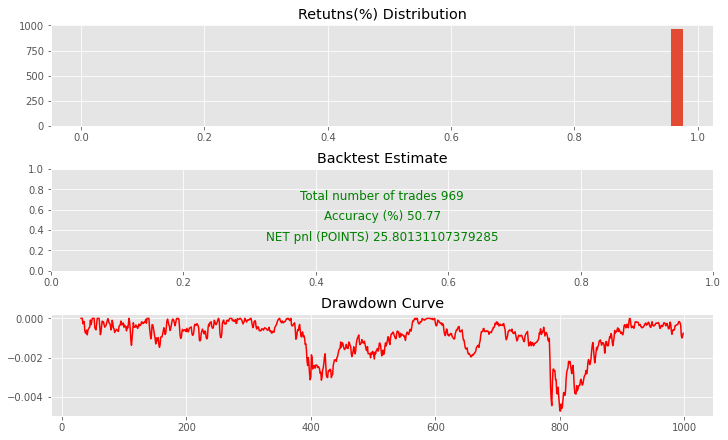

In [202]:
fig, ax = plt.subplots(3, figsize=(10, 6), constrained_layout=True)
ax[0].hist(daily_pct_c1, bins=50)
ax[0].set(title='Retutns(%) Distribution')
ax[1].set(title='Backtest Estimate')
ax[1].text(0.5, 0.3, "NET pnl (POINTS) "+str(Df["pnl"].sum()),
           color='green', fontsize=12, ha='center')
ax[1].text(0.5, 0.5, "Accuracy (%) "+str("%.2f" %
                                         float((npt/(npt+nlt))*100)), color="green", fontsize=12, ha='center')
ax[1].text(0.5, 0.7, "Total number of trades "+str(npt+nlt),
           color='green', fontsize=12, ha='center')
ax[2].plot(Df.index, (drawdown), 'r')
ax[2].set(title='Drawdown Curve')
plt.show()

In [ ]:
#Sharpe ratio

In [208]:
Df['signal']=np.where(Df['prediction'].shift(1)<Df['prediction'], 1, 0)
Df['strategy_returns']=Df['signal']*Df['ret']
sharpe=Df['strategy_returns'].mean()/Df['strategy_returns'].std()*(252**0.5)
print(sharpe)

14.607515155414225


In [ ]:
#CORRELATION BETWEEN PREDICTION & REALIZED RETURN

In [255]:
corr1=ta.CORREL(Df['prediction'], Df['ret'], timeperiod=185)
print(corr1)

29          NaN
30          NaN
31          NaN
32          NaN
33          NaN
         ...   
994   -0.999001
995   -0.999032
996   -0.999059
997   -0.999078
998   -0.999094
Length: 970, dtype: float64


In [256]:
corr1.mean()

-0.994335486928862

In [258]:
corr1.max()

-0.24114696488007423

In [259]:
corr1.min()

-0.9990939221192383

In [ ]:
#CORRELATION BETWEEN PREDICTION_RETURN & REALIZED_RETURN AMPLITUDE

In [260]:
v=corr1.max()-corr1.min()
print(v)

0.757946957239164


In [ ]:
performance indicators

1.Percentage of accurate trades: 50.77
2.Average $ profit and loss (Pnl) per trade: 2.7450
3.Average return per trade (in %): 0.1004
4.Annualized PnL: 0.422
5.Maximum drawdown: -0.004721
6.Sharpe ratio: 14.60
7.Correlation between the predictions and the realized return: -0.99
8.Correlation between the sign of the predictions (as opposed to the
actual values of the returns predicted) and the sign of the realized
returns: negatively correalated
9.Correlation between the amplitude (or log amplitude) of the predictions and the amplitude of the realized returns: 0.7579


    

Reason why this model does not perform well.

This model does not perform well because candles open price is taken into consideration. Current candle open is constant.